In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/drive/MyDrive/Machine learning/Assignment/Assignment 4/adult.csv")


# make a copy of df and store in df1.
df1 = pd.DataFrame.copy(df) 
print(df.columns)


# From above data we can say that education and flnwgt is not required to predict income.
# as we can see education have one more representation as education_num.
print(df.head())
df = df.drop(['education', 'fnlwgt'], axis =1)
print(df.shape)


# we have given missing value as '?' form so we replace it with np.nan
df = df.replace('?', np.nan)
print(df.isnull().sum())

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White 

In [161]:
# from here we can see that only three columns have missing value.let replace it with mode of that atrribute.
for i in ['workclass', 'occupation', 'native.country']:
  df[i].fillna(df[i].mode()[0])
print(df.isnull().sum())
print(df.info())
print(df.describe())
# from above we can see that no outliner here


# encoding of catogerical type to numeric type using 
objcol =[]
for i in df.columns:
  if(df[i].dtype == 'object'):
    objcol.append(i)
# here if y==0 means income less than or equal to 50k and 1 means greater than 50k
print(objcol)


age                  0
workclass         1836
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education.num   32561 non-null  int64 
 3   marital.status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital.gain    32561 non-null  int64 
 9   capital.loss    32561 non-null  int64 
 10  hours.per.week  32561 non-null  int64 
 11  na

In [162]:
from sklearn.preprocessing import LabelEncoder
for i in objcol:
  df[i] = LabelEncoder().fit_transform(df[i])


# converting onject type into int type
for i in df.columns:
  if(df[i].dtype =='object'):
    df[i].astype(int)


# spliting into x and y

y = df['income']
x= df.drop('income',axis =1)


# standardizing the dataframe
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)


#=======================================================
#calculating pca from scrach
# cov matrix
cov_mtx = np.cov(x.T)

# getting values and vector
val, vect = np.linalg.eig(cov_mtx)

sorted_idx = np.argsort(val)[::-1]
# values in decreasing order
val = val[sorted_idx]
vect = vect[:,sorted_idx]


# values into it weight
w_var = [i/sum(val) for i in val]
count =0
proportion=0
for i in w_var:
  if(proportion<0.8):
    proportion += i
    count +=1
  else:
    break
# we have count=9 for 80 percent data
# now we select vect or column 9.
vect = vect[0:count]

# got pca
x_pca = pd.DataFrame(np.dot(vect, x.T).T)

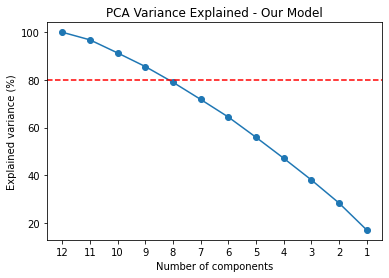

In [163]:

# plot graph
import matplotlib.pyplot as plt
var=np.cumsum(np.round(w_var, decimals=3)*100)
var=var.tolist()
var.reverse()
x_axis=[12,11,10,9,8,7,6,5,4,3,2,1]
default_x_ticks = range(len(x_axis))
plt.plot(default_x_ticks, var, '-o')
plt.xticks(default_x_ticks, x_axis)
plt.axhline(y=80, color='r', linestyle='--')
plt.title('PCA Variance Explained - Our Model')
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

12
[0.17034345 0.11259724 0.09706741 0.09124962 0.08797899 0.08533786
 0.07392739 0.07175938 0.06567672 0.05741211 0.05470105 0.03194879]


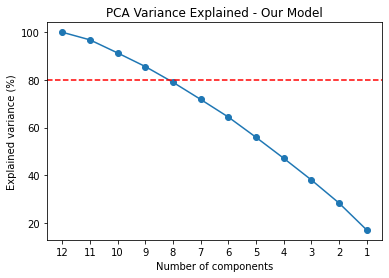

In [164]:
# now pca using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
x = pca.fit_transform(x)
#print(df_scaled.shape)
print(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
var=np.cumsum(np.round(explained_variance, decimals=3)*100)
var=var.tolist()
var.reverse()
x_axis=[12,11,10,9,8,7,6,5,4,3,2,1]
default_x_ticks = range(len(x_axis))
plt.plot(default_x_ticks, var, '-o')
plt.xticks(default_x_ticks, x_axis)
plt.axhline(y=80, color='r', linestyle='--')
plt.title('PCA Variance Explained - Our Model')
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.show()

In [165]:
# we have to take only 80% of data
pca = PCA(n_components = 0.80)
x = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
# spliting into x_test, x_train, y_train, y_test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)


#=====================logistic regression from scratch================
class LogitReg():
    def __init__(self, alpha, epochs):
        self.alpha=alpha
        self.epochs=epochs
    def sigmoid(self, X, W):
        z=np.dot(X, W)
        return 1/(1+np.exp(-z))
    def loss(self, h, Y):
        return((-Y) * np.log(h) - (1-Y) * np.log(1-h)).mean()
    def gradient_descent(Self, X, h, Y):
        return np.dot(X.T, (h-Y)) / Y.shape[0]
    
    def fit(self, X, Y):
        self.b=np.ones((X.shape[0], 1))
        self.X=np.concatenate((self.b, X), axis=1)
        self.W=np.zeros(self.X.shape[1])
        #print(print(self.b.shape, X.shape, self.W.shape))
        self.Y=Y
        for i in range(self.epochs):
            sigma=self.sigmoid(self.X, self.W)
            loss=self.loss(sigma, self.Y)
            dW=self.gradient_descent(self.X, sigma, self.Y)
            self.W -= self.alpha * dW
        #return print('fitted successfully')
    
    def predict(self, X_new):
        #print(self.b.shape, X_new.shape, self.W.shape)
        self.b=np.ones((X_new.shape[0], 1))
        X_new = np.concatenate((self.b, X_new), axis=1)
        result=self.sigmoid(X_new, self.W)
        result=result >= 0.5
        y_pred=np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if(result[i] == True):
                y_pred[i]=1
            else:
                continue
        return y_pred
    
#print(np.size(yPred))   
model=LogitReg(alpha=0.01, epochs=1000)   
model.fit(x_train, y_train)
yPred=model.predict(x_test) 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

TP, TN, FP, FN=0,0,0,0
y_test=y_test.to_numpy()
y_train=y_train.to_numpy()
cnt=0
#print(yPred,'\n', y_test, ytrainPred.shape, Xpca_test.shape)
for cnt in range(np.size(yPred)):
    if(y_test[cnt] == 1 and yPred[cnt] == 1):
        TP+=1
    if(y_test[cnt] == 0 and yPred[cnt] == 0):
        TN+=1
    if(y_test[cnt] == 0 and yPred[cnt] == 1):
        FP+=1
    if(y_test[cnt] == 1 and yPred[cnt] == 0):
        FN+=1

accuracy = (TP+TN)/(TN+FP+TP+FN)
print('Our model accuracy: ', np.round(accuracy, 2))

precision = TP/(TP+FP)
print('Our model precision: ', np.round(precision, 2))

recall  = TP/(TP+FN)
print('Our model recall(sensitivity): ', np.round(recall, 2))
f1_score = 2*(precision * recall) / precision + recall

print('Our model f1 score: ', np.round( f1_score , 2))


Our model accuracy:  0.82
Our model precision:  0.69
Our model recall(sensitivity):  0.41
Our model f1 score:  1.24


In [166]:

#======================inbuild fn of sklearn============================
from sklearn.linear_model import LogisticRegression

# Build the model.
model = LogisticRegression()

# Train the model.
model.fit(x_train, y_train)

# Predict using model
y_pred = model.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Confusion Matrix = ")
print(confusion_matrix(y_test, y_pred), "\n")
print("Accuracy Score = ", accuracy_score(y_test, y_pred), "\n")
print("Classification Report = ")
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
print('Scikit model accuracy: ', np.round(accuracy_score(y_test, y_pred), 2))
print('Scikit model pecision: ', np.round(precision_score(y_test, y_pred), 2))
print('Scikit model recall: ', np.round(recall_score(y_test, y_pred), 2))
print('Scikit model f1 score: ', np.round(f1_score(y_test, y_pred), 2))

Confusion Matrix = 
[[5848  350]
 [1096  847]] 

Accuracy Score =  0.8223805429308438 

Classification Report = 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      6198
           1       0.71      0.44      0.54      1943

    accuracy                           0.82      8141
   macro avg       0.77      0.69      0.71      8141
weighted avg       0.81      0.82      0.81      8141

Scikit model accuracy:  0.82
Scikit model pecision:  0.71
Scikit model recall:  0.44
Scikit model f1 score:  0.54


In [167]:
''''# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = y_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), X2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('LR (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()'''

"'# Visualising the Test set results\nfrom matplotlib.colors import ListedColormap\nx_set, y_set = y_test, y_test\nx1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),\n                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))\nplt.contourf(x1, x2, model.predict(np.array([x1.ravel(), X2.ravel()]).T).reshape(x1.shape),\n             alpha = 0.5, cmap = ListedColormap(('red', 'blue')))\nplt.xlim(x1.min(), x1.max())\nplt.ylim(x2.min(), x2.max())\nfor i, j in enumerate(np.unique(y_set)):\n    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],\n                c = ListedColormap(('red', 'blue'))(i), label = j)\nplt.title('LR (Test set)')\nplt.xlabel('PC1')\nplt.ylabel('PC2')\nplt.legend()\nplt.show()"